# Case Study: Hacker Statistics

This chapter is the last in Intermediate Python for Data science. It blends together everything i've learned up to now. I will use hacker statistics to calculate your chances of winning a bet. Use random number generators, loops and matplotlib to get the competitive edge!

## Context
> * Imagine this situation. You are walking up the empire state building and you're playing a game with a friend. For **100 times** you throw a dice, if it's 1 or 2 you go one step down. If it's 3, 4 or 5 you go one step up. Finally, if you throw a 6 you throw the dice again and will walk the resulting number of eyes up. 
> * You go lower than step zero.
> * You admit that you are a bit clumsy and have a chnace of 0.1 % of falling down the stairs when you make a move. Falling down means that you have to start again from step 0. 

With all of that in mind you bet with your friend that's you will reach 60 steps high.

## Question
**_What is the chance that you will win this bet?_**

## How to solve?
The process will be simulated thousands of times and determine in what fraction of the simulations that you will reach 60 steps (This is a form of hacker statistics).
To do this we will go through the following steps:
* [Step 1: _**Random Generators to simulate the dice**_](#Step1)
* [Step 2 : _**Determine your next move**_](#Step2)
* [Step 3: _**Simulate a Random Walk**_](#Step3)
* [Step 4: _**Visualize the walk**_](#Step4)
* [Step 5: _**The distribution of random walks**_](#Step5)
* [Step 6: _**Implement clumsiness**_](#Step6)
* [Step 7: _**Plot the distribution**_](#Step7)
* [Step 8: _**Calculate the odds**_](#Step8)

### Step 1: Random Generators to simulate the dice <a class="anchor" id='Step1'></a>
- Through creating the so called pseudo-random numbersstarting from a random seed. We are going to set the seed manually to 123 to ensure reproducibility. Upon running different versions of the same algorithim, we know that they are using the same random numbers so we can make a fair comparison between these versions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#setting the seed to (123)
np.random.seed(123)
# Use randint() to simulate a dice
np.random.randint(1,7)

6

In [3]:
np.random.randint(1,7)

3

### Step 2 : Determine your next move<a class="anchor" id='Step2'></a>
- In the Empire State Building bet, your next move depends on the number of eyes you throw with the dice. We can perfectly code this with an if-elif-else construct!

In [4]:
# let's assume that you're currently at step 10
step = 10

# Roll the dice
dice = np.random.randint(1,7)

# The control construct
if dice <= 2: 
    #If dice is 1 or 2, you go one step down.
    step -= 1
elif dice < 6:
    # if dice is 3, 4 or 5, you go one step up.
    step += 1
else:
    # Else, you throw the dice again. The number of eyes is the number of steps you go up.
    step = step + np.random.randint(1,7)
    
# Print out dice and step
print("number of eyes: " + str(dice))
print("Steps updated: " + str(step))    

number of eyes: 5
Steps updated: 11


### Step 3: Simulate a Random Walk<a class="anchor" id='Step3'></a>
* If you use a dice to determine your next step, we can call this a random step. What if you use a dice 100 times to determine your next step? You would have a succession of random steps or in other words **_a random walk_**. This is a well known concept in science. For example, the path traced by a molecule as it travels through a liquid or gas can be **modeled** as a random walk. Financial status of a gambler is another example.
* To record every step in a random walk, you need to learn how to gradually build a list with a for loop. 

In [5]:
# Initialize random_walk
random_walk = [0]

for s in range(100):
    # Set step: last element in random_walk
    step = random_walk[-1]
    
    # Roll the dice
    dice = np.random.randint(1,7)
    
    # detrmine the next step
    if dice <= 2: 
    #If dice is 1 or 2, you go one step down and use max to make sure step can't go below 0
        step = max(0, step-1)
    elif dice < 6:
    # if dice is 3, 4 or 5, you go one step up.
        step += 1
    else:
    # Else, you throw the dice again. The number of eyes is the number of steps you go up.
        step = step + np.random.randint(1,7)
    
    # append next_step to random_walk
    random_walk.append(step)
    
print(random_walk)

[0, 1, 0, 1, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60, 64, 63]


### Step 4: Visualize the walk<a class="anchor" id='Step4'></a>
Let's visualize this random walk via a line plot

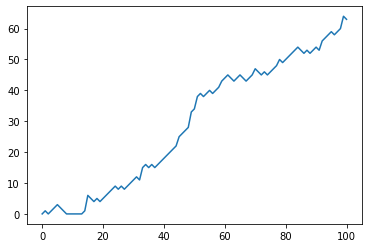

In [6]:
plt.plot(random_walk);

### Step 5: The distribution of random walks <a class="anchor" id='Step5'></a>
- After simulating the random walk we need to answer the main question, **What is the chance that you'll reach 60 steps high?**
- Each random walk will end up at a different step, simulating this walk thousands of times will yield thousands of final steps. This is actually distribution of final steps that enables calculating the chances. 

In [7]:
# Initialize all walks
all_walks = []

# Simulate the random walk 10 times
for i in range(10):
    # Initialize random_walk
    random_walk = [0]

    for s in range(100):
        # Set step: last element in random_walk
        step = random_walk[-1]

        # Roll the dice
        dice = np.random.randint(1,7)

        # detrmine the next step
        if dice <= 2: 
        #If dice is 1 or 2, you go one step down and use max to make sure step can't go below 0
            step = max(0, step-1)
        elif dice < 6:
        # if dice is 3, 4 or 5, you go one step up.
            step += 1
        else:
        # Else, you throw the dice again. The number of eyes is the number of steps you go up.
            step = step + np.random.randint(1,7)

        # append next_step to random_walk
        random_walk.append(step)
    
    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22, 21, 20, 19, 18, 17, 18, 19, 20, 26, 25, 24, 23, 24, 25, 26, 25, 26, 27, 26, 31, 32, 31, 30, 29, 28, 29, 28, 27, 29, 30, 33, 34, 36, 37, 38, 39, 38, 37, 38, 39, 40, 41, 40, 41, 42, 43, 46, 47, 48, 47, 48, 47, 48, 49, 50, 54, 53, 52, 53, 54, 55, 54, 55, 54, 55, 57, 62, 61, 62, 63, 64, 65, 66, 67, 66, 67, 68, 69, 71, 73, 72], [0, 1, 2, 5, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 8, 10, 9, 8, 9, 10, 9, 11, 12, 13, 14, 15, 16, 17, 16, 17, 18, 23, 24, 23, 22, 21, 20, 21, 22, 23, 28, 29, 28, 29, 30, 31, 32, 33, 34, 33, 32, 33, 32, 38, 37, 38, 37, 38, 37, 38, 42, 46, 48, 50, 49, 50, 52, 51, 57, 58, 60, 61, 60, 61, 62, 63, 62, 63, 64, 65, 67, 66, 65, 66, 72, 77, 76, 75, 79, 80, 81, 82, 84, 83, 84, 83, 84, 83, 82, 88, 87], [0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 8, 7, 6, 7, 6, 7, 6, 7, 8, 12, 13, 12, 18, 17, 16, 17, 16, 15, 16, 15, 19, 18, 19, 18, 19, 18, 19, 21, 20, 19, 18, 19, 18, 23, 24, 25, 24, 23, 24, 23, 24, 23, 28, 29, 28, 27, 26, 25, 

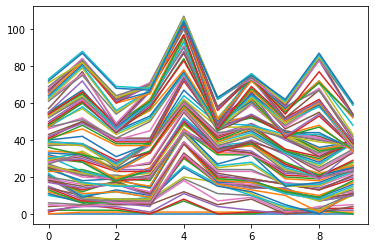

<Figure size 432x288 with 0 Axes>

In [8]:
# all_walks is a list of lists: every sub-list represents a single random walk. 
#If you convert this list of lists to a Numpy array, you can start making interesting plots!

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)
# Plot np_aw and show
plt.plot(np_aw)
plt.show()
# Clear the figure
plt.clf()

Transpose np_aw by calling np.transpose() on np_aw. Call the result np_aw_t. Now every row in np_all_walks represents the position after 1 throw for the 10 random walks.  Transposing the 2D Numpy array was crucial; otherwise Python misunderstood.

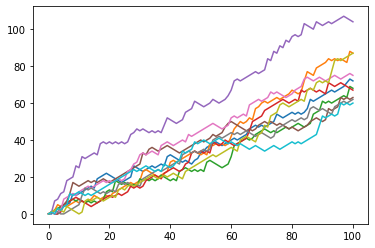

In [9]:
# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)
# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

### Step 6: Implement clumsiness <a class='anchor' id='Step6'></a>
As per the written code, changing the number of times the random walk should be simulated is super-easy. You simply update the range() function in the top-level for loop.

There's still something we forgot! You're a bit clumsy and you have a 0.1% chance of falling down. That calls for another random number generation. Basically, you can generate a random float between 0 and 1. If this value is less than or equal to 0.001, you should reset step to 0.

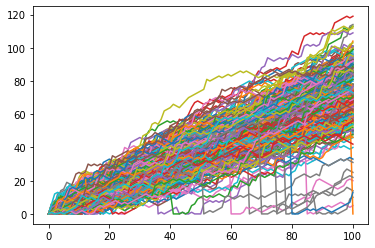

In [10]:
# Initialize all walks
all_walks = []

# Simulate the random walk 250 times
for i in range(250):
    # Initialize random_walk
    random_walk = [0]

    for s in range(100):
        # Set step: last element in random_walk
        step = random_walk[-1]

        # Roll the dice
        dice = np.random.randint(1,7)

        # detrmine the next step
        if dice <= 2: 
        #If dice is 1 or 2, you go one step down and use max to make sure step can't go below 0
            step = max(0, step-1)
        elif dice < 6:
        # if dice is 3, 4 or 5, you go one step up.
            step += 1
        else:
        # Else, you throw the dice again. The number of eyes is the number of steps you go up.
            step = step + np.random.randint(1,7)
        
        # Implement clumsiness
        if np.random.rand() <= 0.001:
            step = 0
            
        # append next_step to random_walk
        random_walk.append(step)
    
    # Append random_walk to all_walks
    all_walks.append(random_walk)
# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t);

### Step 7: Plot the distribution<a class='anchor' id='Step7'></a>
All these fancy visualizations have put us on a sidetrack. We still have to solve the million-dollar problem: What are the odds that you'll reach 60 steps high on the Empire State Building?

Basically, you want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.

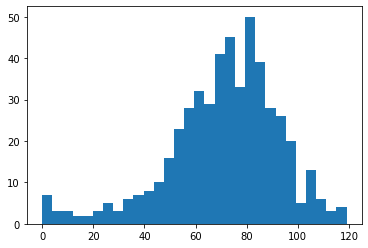

In [11]:
# Initialize all walks
all_walks = []

# Simulate the random walk 500 times
for i in range(500):
    # Initialize random_walk
    random_walk = [0]

    for s in range(100):
        # Set step: last element in random_walk
        step = random_walk[-1]

        # Roll the dice
        dice = np.random.randint(1,7)

        # detrmine the next step
        if dice <= 2: 
        #If dice is 1 or 2, you go one step down and use max to make sure step can't go below 0
            step = max(0, step-1)
        elif dice < 6:
        # if dice is 3, 4 or 5, you go one step up.
            step += 1
        else:
        # Else, you throw the dice again. The number of eyes is the number of steps you go up.
            step = step + np.random.randint(1,7)
        
        # Implement clumsiness
        if np.random.rand() <= 0.001:
            step = 0
            
        # append next_step to random_walk
        random_walk.append(step)
    
    # Append random_walk to all_walks
    all_walks.append(random_walk)

    
# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1, :]

# Plot histogram of ends, display plot
plt.hist(ends, bins=30);

### Step 8: Calculate the odds<a class='anchor' id='Step8'></a>
The histogram of the previous code was created from a Numpy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

Well then, what's the estimated chance that you'll reach 60 steps high if you play this Empire State Building game?

In [12]:
# Calculating the odds
ends_60 = ends[ends >= 60]
odds = len(ends_60) / len(ends)
odds

0.748

There's 74.8% chance of reaching the 60 steps and winning the bet